# Settings

Installed scrublet by running `pip install scrublet --user` in the terminal (not sudo).

In [1]:
import pandas as pd
import os
import sys
import gc
import subprocess
import concurrent.futures
from multiprocessing import Pool
from datetime import date
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Visual variables
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
gc.enable()

In [4]:
# Set directories
base_dir = "/nfs/lab/projects/mega_heart/CAREHF/multiome/"
assets_dir = os.path.join(base_dir, "Assets")

cell_ranger_dir = os.path.join(base_dir, "cellranger.symlinks")

step1_dir = os.path.join(base_dir, "Analysys/1_preprocessing/")
step2_dir = os.path.join(base_dir, "Analysys/2_PeaksReformat/")
step3_dir = os.path.join(base_dir, "Analysys/3_SoupX/")
step4_dir = os.path.join(base_dir, "Analysys/4_Doublet_cleanup/scrublet/")

In [5]:
# Load sample info
sample_info = pd.read_csv(os.path.join(assets_dir, "sample.info"), sep="\t", header=0)

# Build variables
sample_ls = sample_info["ID"].tolist()
cellranger_outs_ls = [
    f"{row['CellRanger']}{row['Chamber']}/{row['ID']}/outs/"
    for _, row in sample_info.iterrows()
]

# Check the paths are correct
print(sample_ls[0])
print(cellranger_outs_ls[0])

KA_49_1_2_KA_45_1_2
/nfs/lab/projects/CARE_HF/DATA/multiome/LA/KA_49_1_2_KA_45_1_2/outs/


In [6]:
def run_scrublet(i):
    gc.collect()
    # Set sample variable
    sample = sample_ls[i]
    print("Workin on: " + sample)
    # Load data
    counts_matrix = scipy.io.mmread(step4_dir + sample + '_matrix.mtx').T.tocsc()
    genes = np.array(scr.load_genes(step4_dir + sample + '_genes.tsv', delimiter='\t', column=0))

    scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                                  min_cells=3, 
                                                                  min_gene_variability_pctl=85, 
                                                                  n_prin_comps=30)

    # Get automatic threshold
    auto_threshold = scrub.threshold_

    # Save the automatic threshold to file
    with open(step4_dir + sample + '_auto_threshold.txt', 'w') as f:
        f.write(str(auto_threshold))

    # Pull out predicted doublets from Scrublet
    predicted_doublets = scrub.call_doublets() 

    # Plot doublets distribution
    scrub.plot_histogram()
    plt.savefig(step4_dir + sample + '_scrub.plot.png')
    
    # Write out results to a new file
    barcodes_fp = step4_dir + sample + '_barcodes.tsv'
    with open(barcodes_fp, 'r') as f:
        with open(step4_dir + sample + '_scrublet_predicted_doublets.txt', 'w') as o:
            counter=0
            for line in f:
                o.write('\t'.join((line.strip(), str(predicted_doublets[counter]), str(doublet_scores[counter]), '\n')))
                counter+=1

    # Delete object and continue loop
    del scrub

In [7]:
num_cores = 1 # set the number of cores to use here

with Pool(processes=num_cores) as pool:
    pool.map(run_scrublet, range(len(sample_ls)))

Workin on: KA_49_1_2_KA_45_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 32.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.6%
Elapsed time: 29.9 seconds
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 32.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.6%


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Workin on: QY_1880_1_2_QY_1879_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.13
Detected doublet rate = 10.4%
Estimated detectable doublet fraction = 64.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 16.1%
Elapsed time: 46.4 seconds
Automatically set threshold at doublet score = 0.13
Detected doublet rate = 10.4%
Estimated detectable doublet fraction = 64.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 16.1%
Workin on: QY_1882_1_2_QY_1881_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 17.2%
Estimated detectable doublet fraction = 68.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.1%
Elapsed time: 45.8 seconds
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 17.2%
Estimated d

Workin on: QY_1858_1_2_QY_1857_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 13.5%
Estimated detectable doublet fraction = 64.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 21.1%
Elapsed time: 67.8 seconds
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 13.5%
Estimated detectable doublet fraction = 64.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 21.1%
Workin on: QY_1860_1_2_QY_1859_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 16.2%
Estimated detectable doublet fraction = 66.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 24.1%
Elapsed time: 43.4 seconds
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 16.2%
Estimated d

/home/luca/.local/lib/python3.8/site-packages/scrublet/scrublet.py:485: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Workin on: QY_1914_1_2_QY_1913_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 14.6%
Estimated detectable doublet fraction = 70.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 20.9%
Elapsed time: 31.8 seconds
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 14.6%
Estimated detectable doublet fraction = 70.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 20.9%
Workin on: QY_1916_1_2_QY_1915_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 39.7 seconds
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detec

# Adjust thresholding when needed

In [8]:
sample_ls

['KA_49_1_2_KA_45_1_2',
 'QY_1880_1_2_QY_1879_1_2',
 'QY_1882_1_2_QY_1881_1_2',
 'QY_1920_1_2_QY_1919_1_2',
 'QY_1971_1_2_QY_1970_1_2',
 'QY_2015_1_2_QY_2014_1_2',
 'QY_2039_1_2_QY_2038_1_2',
 'QY_2047_1_2_QY_2046_1_2',
 'QY_2051_1_2_QY_2050_1_2',
 'JB_631_1_2_JB_627_1_2',
 'JB_632_1_2_JB_628_1_2',
 'JB_633_1_2_JB_629_1_2',
 'JB_634_1_2_3_JB_630_1_2_3',
 'MM_507_1_2_MM_512_1_2',
 'QY_1856_1_2_QY_1855_1_2',
 'QY_1854_1_2_QY_1853_1_2',
 'QY_1858_1_2_QY_1857_1_2',
 'QY_1860_1_2_QY_1859_1_2',
 'KA_47_1_2_KA_43_1_2',
 'KA_50_1_2_KA_46_1_2',
 'QY_1886_1_2_QY_1885_1_2',
 'QY_1914_1_2_QY_1913_1_2',
 'QY_1916_1_2_QY_1915_1_2',
 'QY_1969_1_2_QY_1968_1_2',
 'QY_2019_1_2_QY_2018_1_2',
 'QY_2045_1_2_QY_2044_1_2',
 'QY_2049_1_2_QY_2048_1_2',
 'KA_48_1_2_KA_44_1_2',
 'QY_1922_1_2_QY_1921_1_2',
 'QY_1924_1_2_QY_1923_1_2',
 'QY_1967_1_2_QY_1966_1_2',
 'QY_1973_1_2_QY_1972_1_2',
 'QY_2017_1_2_QY_2016_1_2',
 'QY_2041_1_2_QY_2040_1_2',
 'QY_2043_1_2_QY_2042_1_2',
 'QY_2053_1_2_QY_2052_1_2']

In [9]:
sample_change = ['JB_631_1_2_JB_627_1_2', 'QY_1916_1_2_QY_1915_1_2', 'QY_2015_1_2_QY_2014_1_2',
    'QY_2021_1_2_QY_2020_1_2', 'JB_634_1_2_3_JB_630_1_2_3', 'QY_2047_1_2_QY_2046_1_2', 
    'QY_2045_1_2_QY_2044_1_2', 'QY_2049_1_2_QY_2048_1_2', 'MM_507_1_2_MM_512_1_2',
    'QY_2051_1_2_QY_2050_1_2', 'KA_48_1_2_KA_44_1_2', 'QY_2017_1_2_QY_2016_1_2', 'QY_2019_1_2_QY_2018_1_2']

Working on: JB_631_1_2_JB_627_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 40.0%
Elapsed time: 10.2 seconds


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Fine-tuning: JB_631_1_2_JB_627_1_2
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 12.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.6%
Completed: JB_631_1_2_JB_627_1_2
Working on: QY_1916_1_2_QY_1915_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 22.0 seconds
Fine-tuning: QY_1916_1_2_QY_1915_1_2
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 4.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.8%
Completed: QY_1916_1_2_QY_1915_1_2
Working on: QY_2015_1_2_QY_2014_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.2%
Estimate

/home/luca/.local/lib/python3.8/site-packages/scrublet/scrublet.py:485: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Fine-tuning: QY_2021_1_2_QY_2020_1_2
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 18.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.3%
Completed: QY_2021_1_2_QY_2020_1_2
Working on: JB_634_1_2_3_JB_630_1_2_3
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 66.7%
Elapsed time: 3.9 seconds
Fine-tuning: JB_634_1_2_3_JB_630_1_2_3
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 27.1%
Completed: JB_634_1_2_3_JB_630_1_2_3
Working on: QY_2047_1_2_QY_2046_1_2
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0

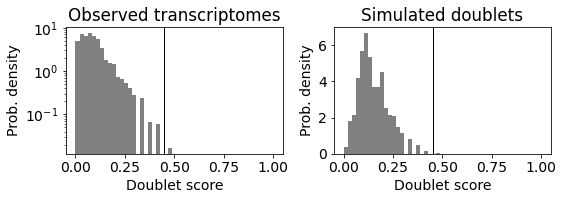

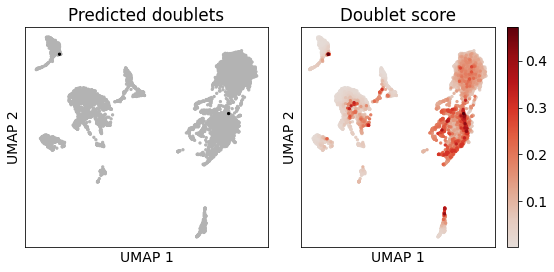

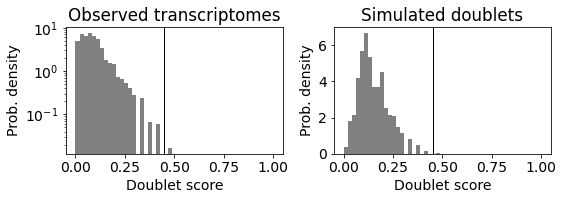

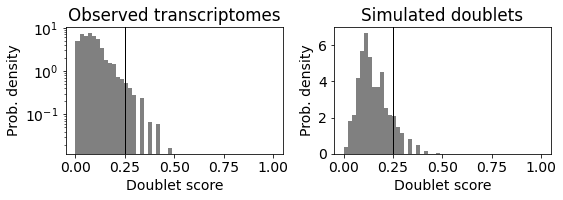

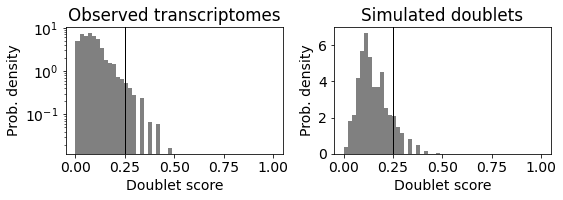

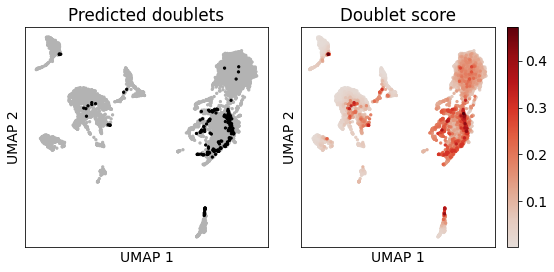

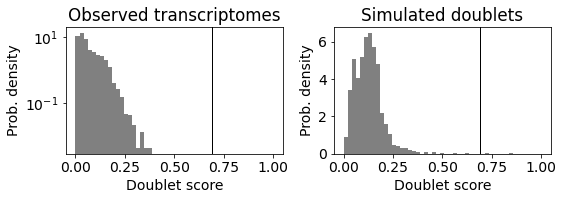

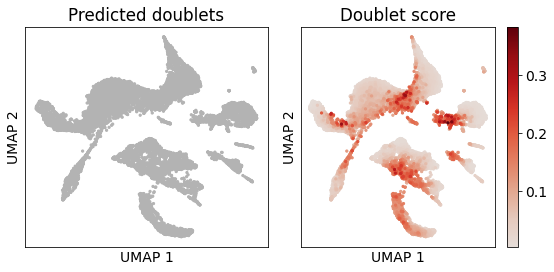

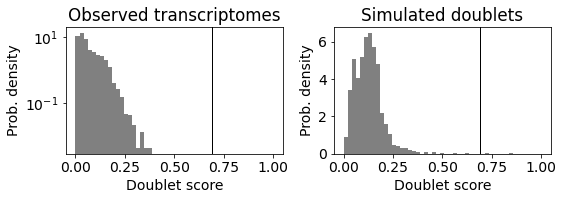

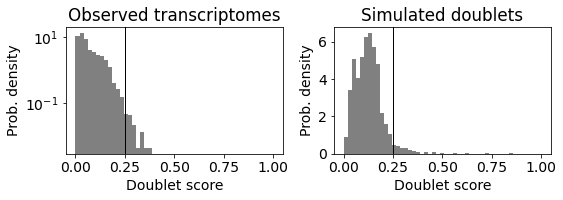

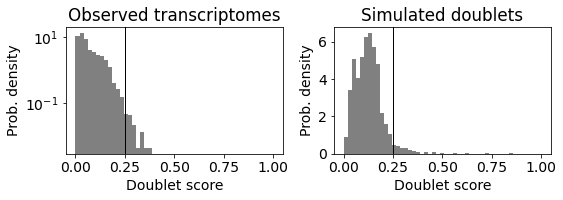

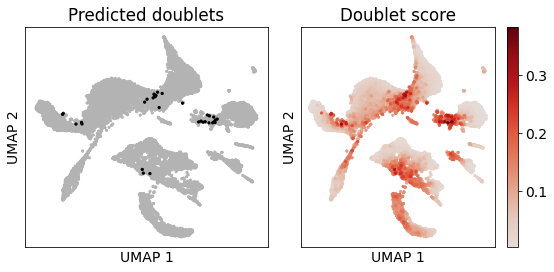

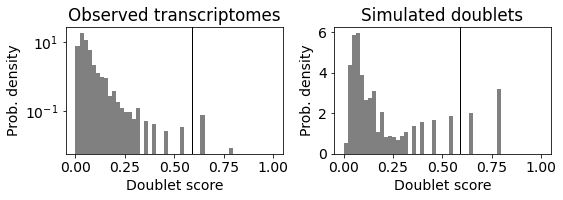

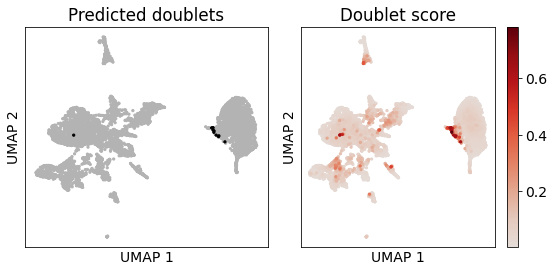

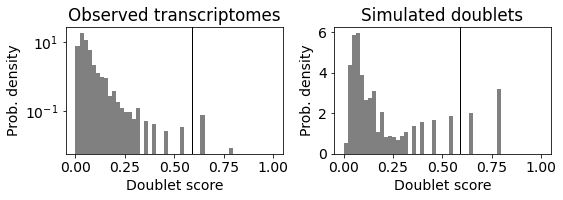

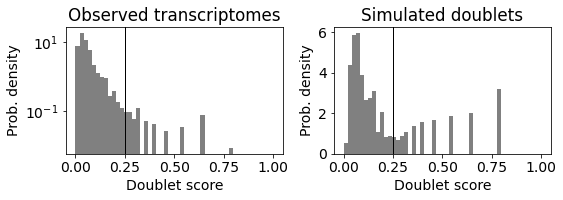

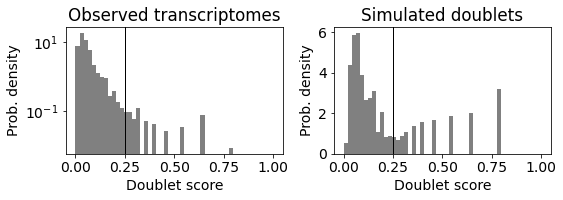

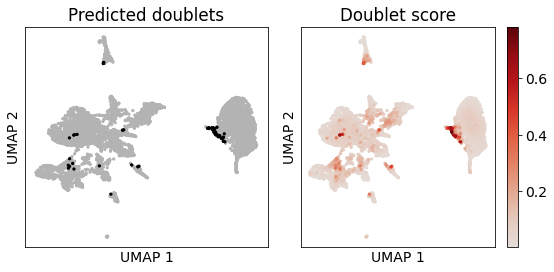

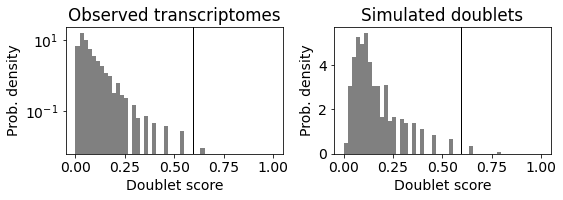

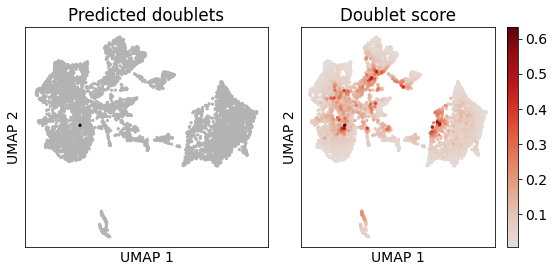

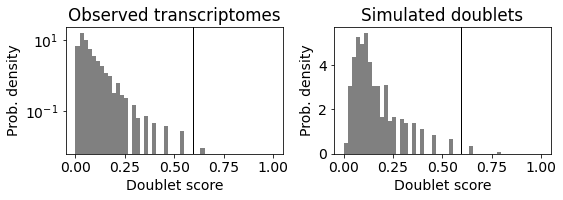

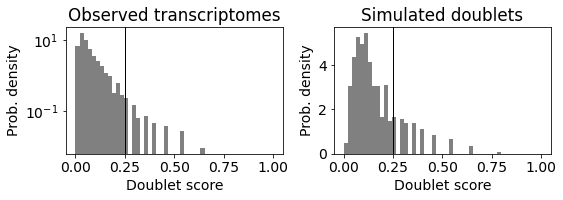

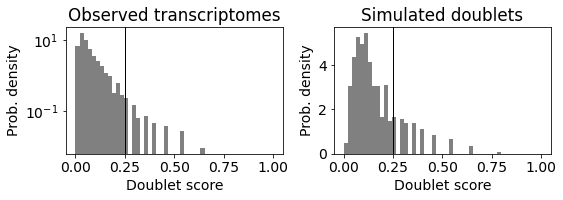

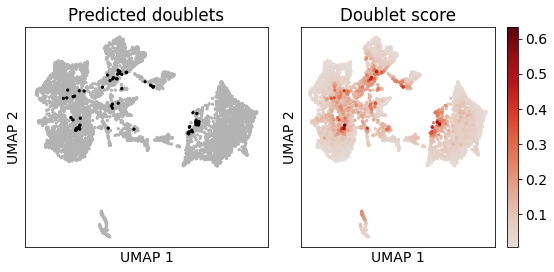

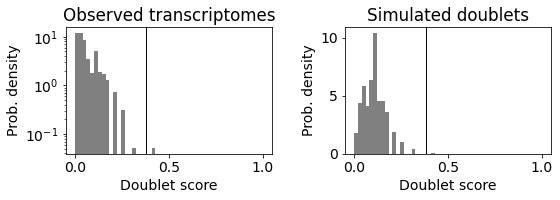

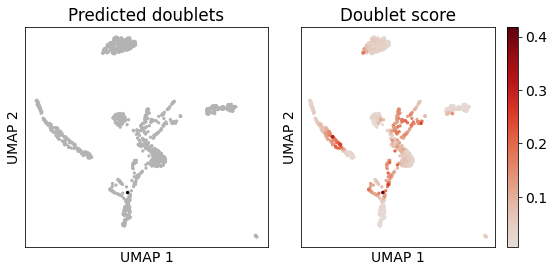

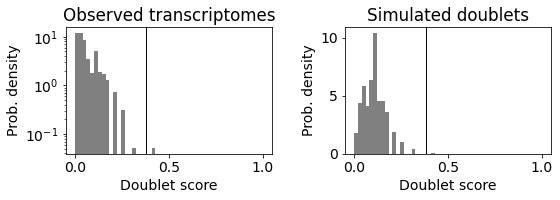

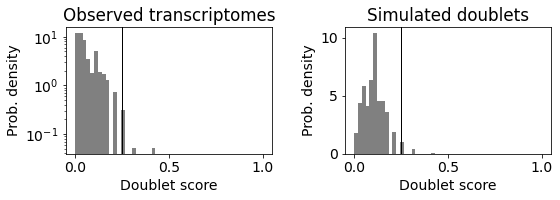

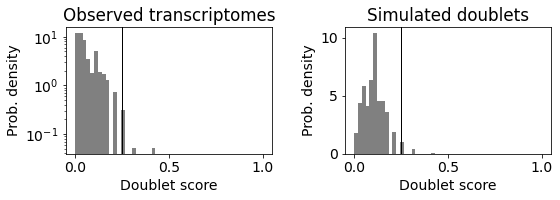

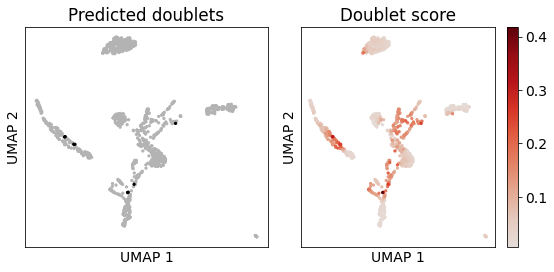

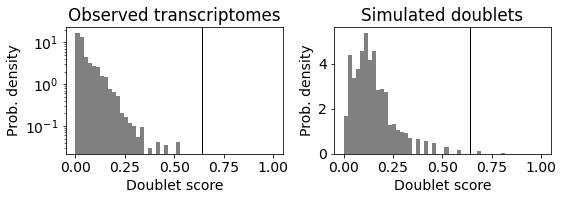

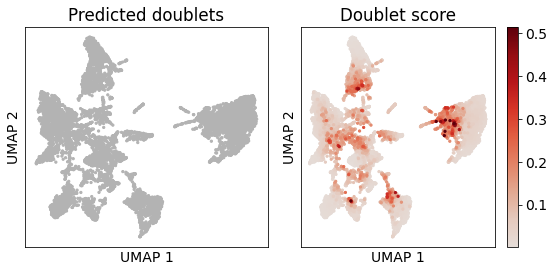

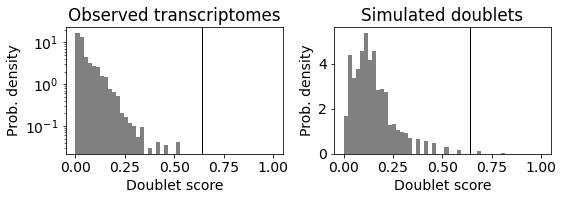

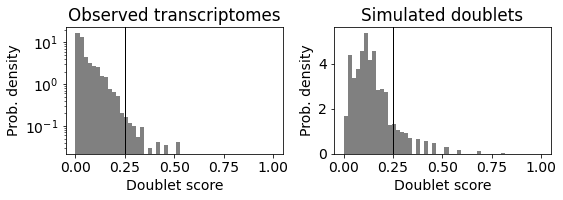

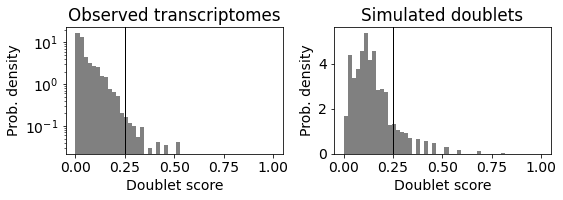

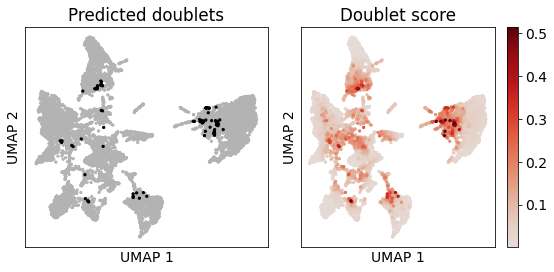

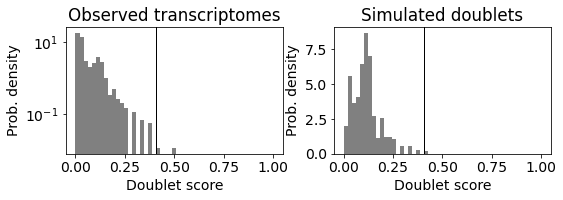

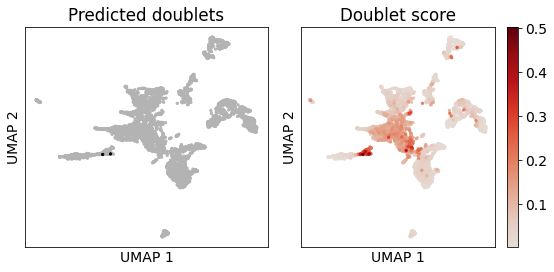

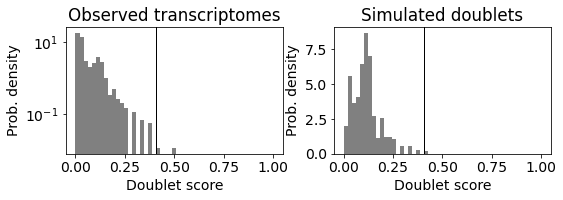

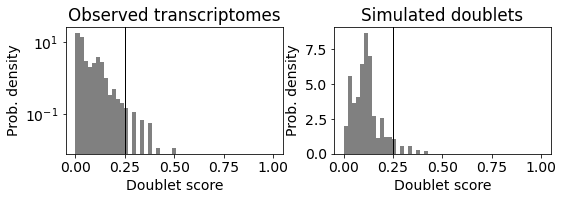

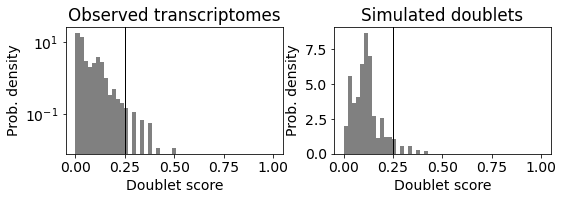

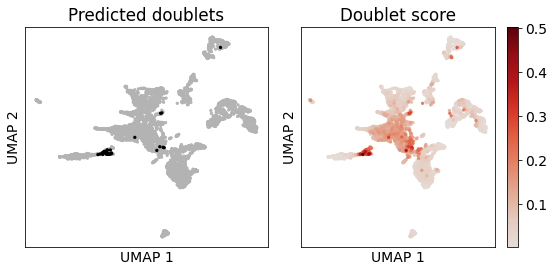

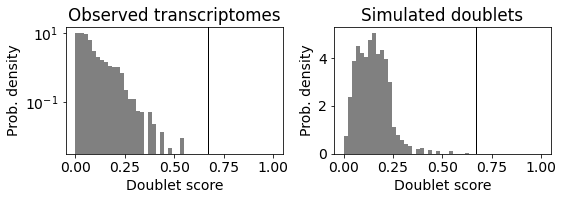

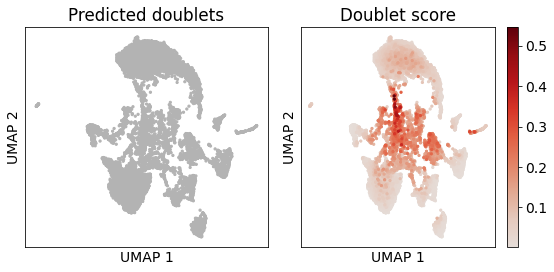

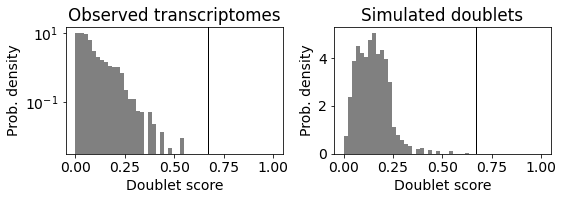

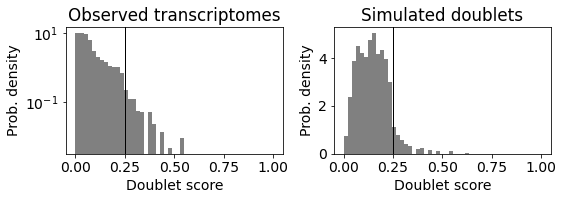

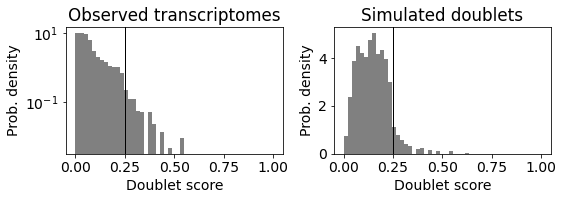

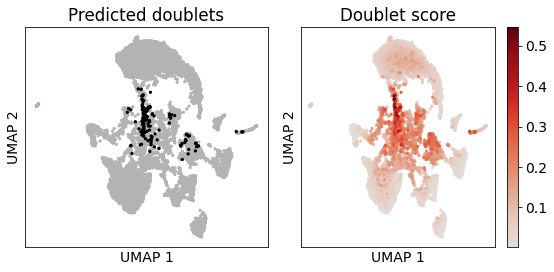

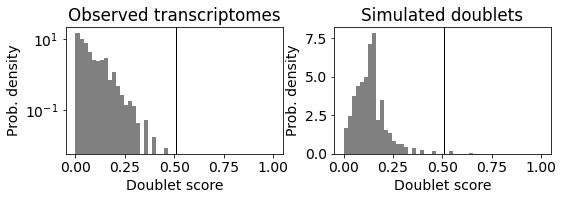

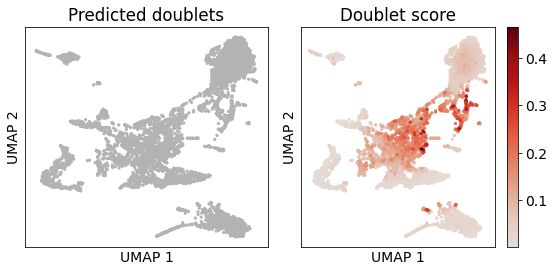

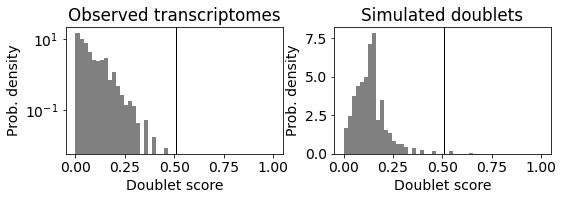

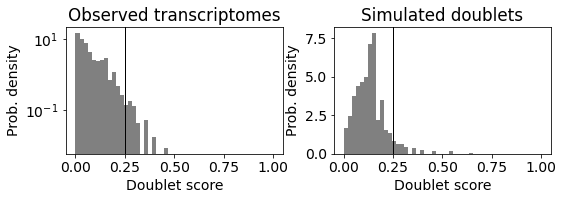

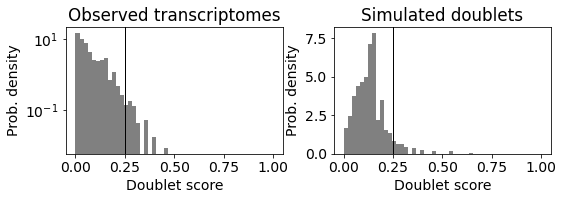

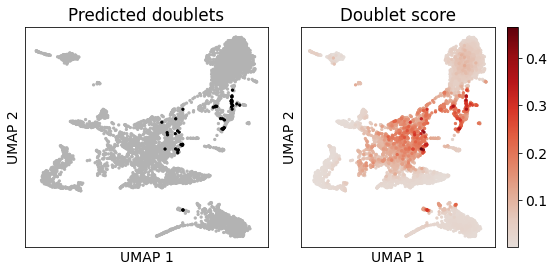

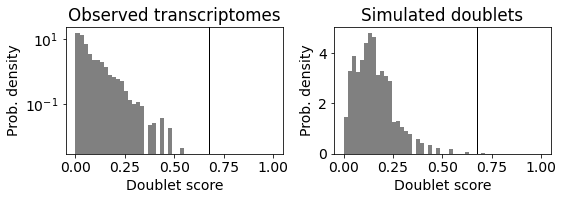

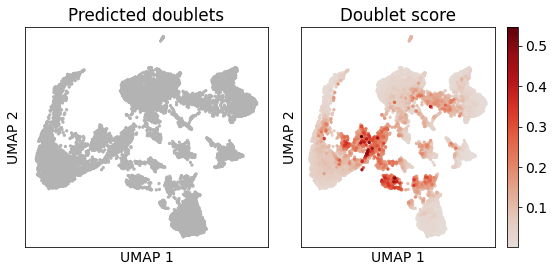

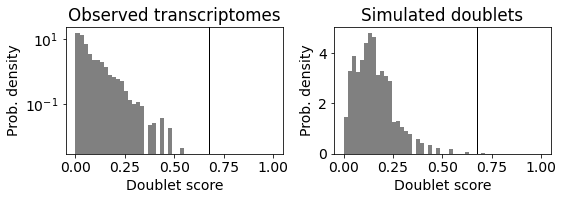

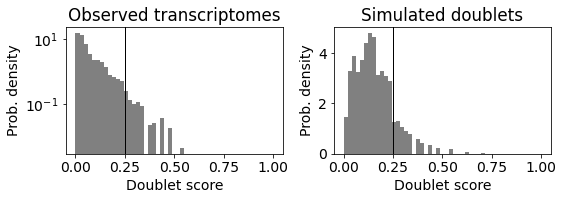

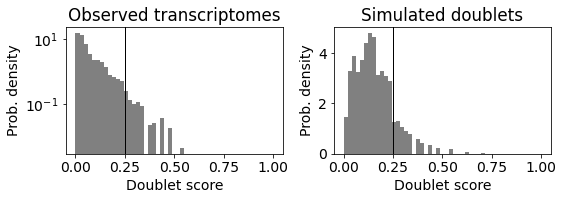

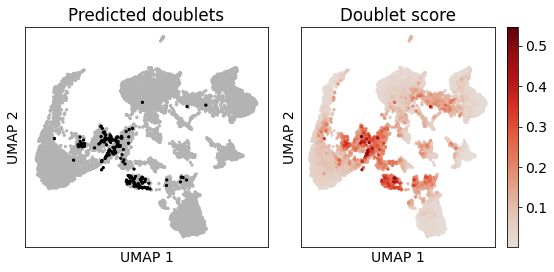

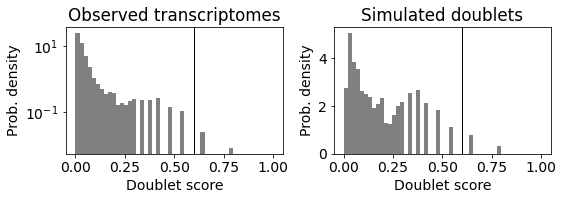

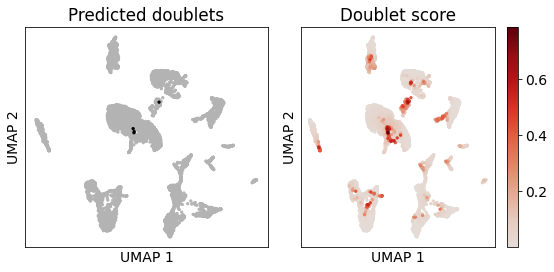

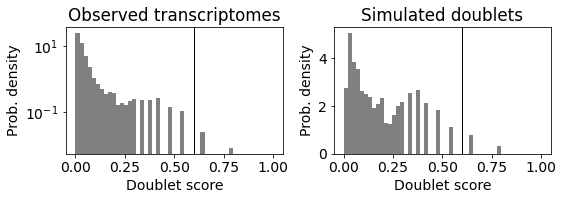

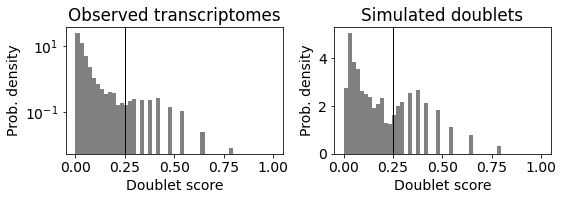

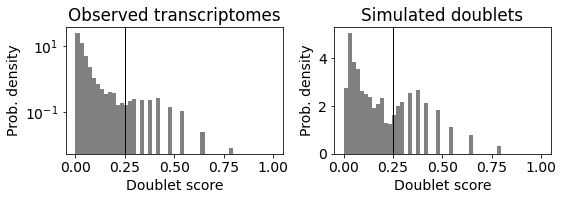

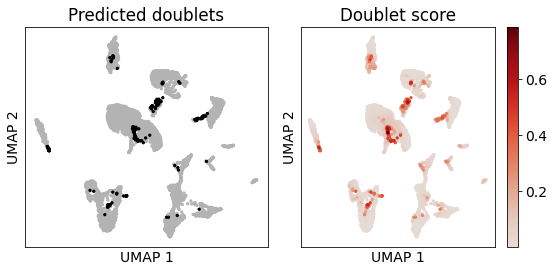

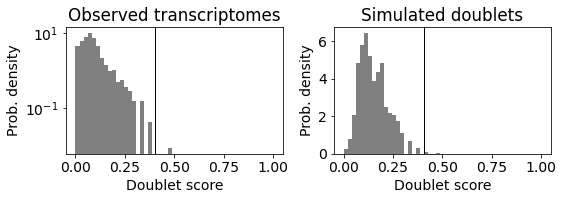

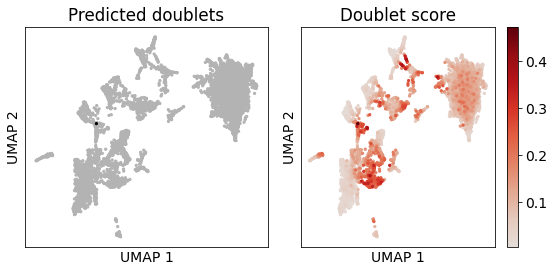

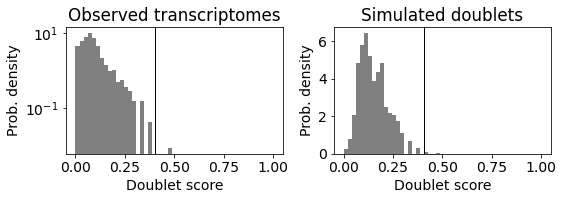

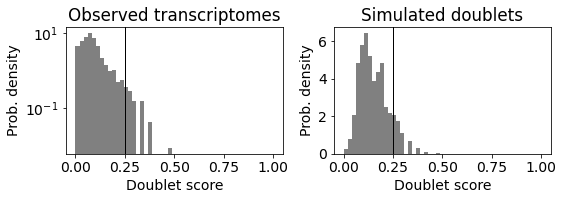

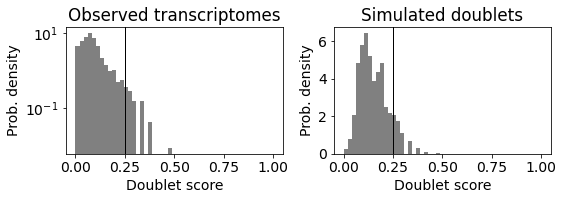

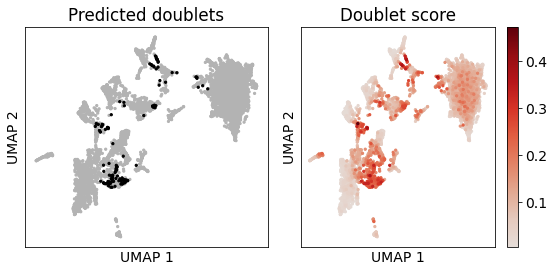

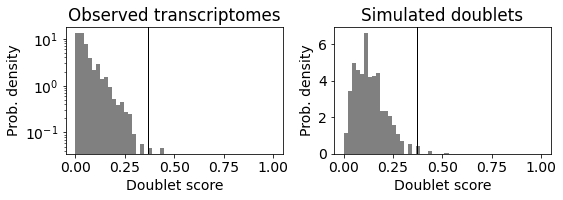

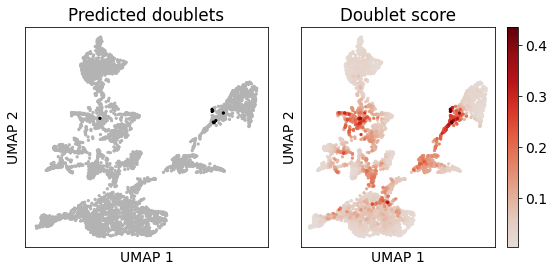

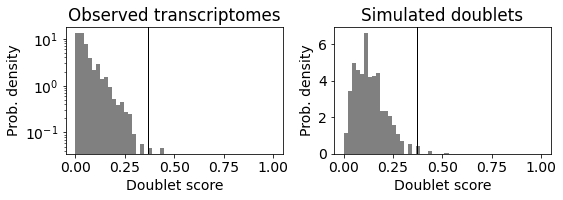

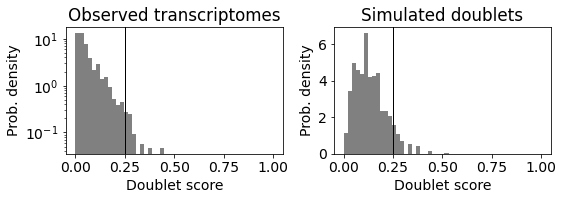

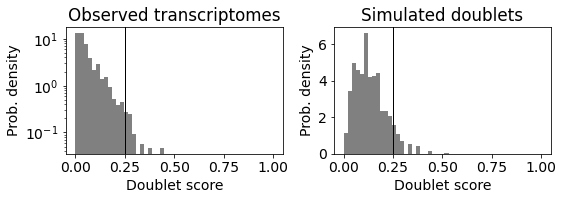

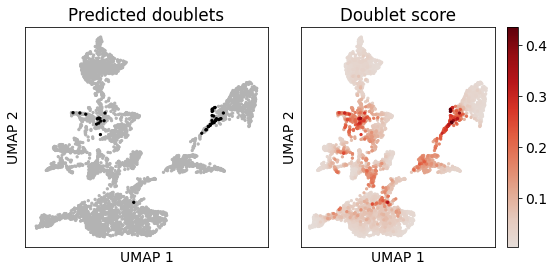

In [10]:
for i in range(len(sample_change)):
    gc.collect()
    
    # Set sample variable
    sample_ID = sample_change[i]
    print("Working on: " + sample_ID)
    
    # Load data
    counts_matrix = scipy.io.mmread(step4_dir + sample_ID + '_matrix.mtx').T.tocsc()
    genes = np.array(scr.load_genes(step4_dir + sample_ID + '_genes.tsv', delimiter='\t', column=0))
    
    scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
    doublet_scores, predicted_doublelets = scrub.scrub_doublets(min_counts=2, 
                                                                min_cells=3, 
                                                                min_gene_variability_pctl=85, 
                                                                n_prin_comps=30)
    scrub.plot_histogram()
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    scrub.plot_embedding('UMAP', order_points=True)

    # Plot doublets distribution
    scrub.plot_histogram()
    plt.savefig(step4_dir + sample_ID + '_scrub.plot.png')
    
    print("Fine-tuning: " + sample_ID)
    thresh = 0.25
    # Set manual threshold here, trying to split the 2 populations
    # Pull out predicted doublets from Scrublet
    predicted_doublelets = scrub.call_doublets(threshold=thresh)
    scrub.plot_histogram()

    # Get automatic threshold
    auto_threshold = scrub.threshold_

    # Plot doublets distribution
    scrub.plot_histogram()
    plt.savefig(step4_dir + sample_ID + '_scrub.plot.png')

    # Check where doublets fall
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    scrub.plot_embedding('UMAP', order_points=True)

    # Overwrite the automatic threshold to file
    with open(step4_dir + sample_ID + '_auto_threshold.txt', 'w') as f:
        f.write(str(auto_threshold))
    
    # Write out results to a new file
    barcodes_fp = step4_dir + sample_ID + '_barcodes.tsv'
    with open(barcodes_fp, 'r') as f:
        with open(step4_dir + sample_ID + '_scrublet_predicted_doublets.txt', 'w') as o:
            counter = 0
            for line in f:
                o.write('\t'.join((line.strip(), str(predicted_doublelets[counter]), str(doublet_scores[counter]))) + '\n')
                counter += 1

    print("Completed: " + sample_ID)